In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def load_timings(csv_path):
    """Load the timings CSV into a pandas DataFrame."""
    df = pd.read_csv(csv_path)
    return df

def summarize_timings(df):
    """Print summary statistics for each algorithm and plot mean timings."""
    summary = df.groupby(['vertices', 'edges', 'bmssp'])['elapsed_seconds'].agg(['mean', 'std', 'min', 'max', 'count'])
    print(summary)
    return summary

def plot_mean_timings(df):
    """Plot mean elapsed time vs. number of edges for each algorithm."""
    df = df[df['vertices'] == 5000000]
    means = df.groupby(['edges', 'bmssp'])['elapsed_seconds'].mean().reset_index()
    for bmssp_val in means['bmssp'].unique():
        subset = means[means['bmssp'] == bmssp_val]
        plt.plot(subset['edges'], subset['elapsed_seconds'], marker='o', label=f'bmssp={bmssp_val}')
    plt.xlabel('Number of edges')
    plt.ylabel('Mean elapsed time (s)')
    plt.title('Mean elapsed time vs. edges')
    plt.legend()
    plt.show()

def plot_boxplot(df):
    """Boxplot of timings for each algorithm and edge count."""
    df['bmssp'] = df['bmssp'].astype(str)
    plt.figure(figsize=(12,6))
    df.boxplot(column='elapsed_seconds', by=['edges', 'bmssp'])
    plt.ylabel('Elapsed time (s)')
    plt.title('Timing distribution by edges and algorithm')
    plt.suptitle('')
    plt.show()

                            mean       std       min       max  count
vertices edges   bmssp                                               
10000    20000   False  0.000054  0.000024  0.000026  0.000096     10
                 True   0.002112  0.000189  0.001966  0.002468     10
         40000   False  0.000066  0.000036  0.000035  0.000120     10
                 True   0.004102  0.000067  0.004059  0.004282     10
         80000   False  0.000092  0.000052  0.000027  0.000296     40
                 True   0.008207  0.000225  0.007944  0.008915     40
100000   20000   False  0.000574  0.000312  0.000201  0.001104     10
                 True   0.002124  0.000112  0.002037  0.002414     10
         40000   False  0.000748  0.000242  0.000322  0.001037     10
                 True   0.008379  0.000206  0.008109  0.008772     10
         200000  False  0.001026  0.000678  0.000465  0.002363     10
                 True   0.041803  0.001340  0.039932  0.044336     10
         400000  Fal

/tmp/ipykernel_3858176/2000883719.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


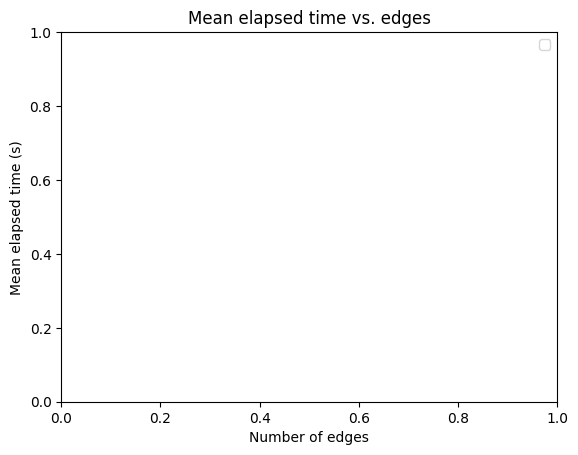

In [3]:
# Example usage:
df = load_timings('dijkstra_timings.csv')
summarize_timings(df)
plot_mean_timings(df)